# Word vector visualization with Gensim

Source: 😊[Day 12 - Special Data Types: Natural Language Processing](https://github.com/core-skills/12-text-processing) *repository*

> ☝️Before moving on with this notebook, ensure that you have:
- Downloaded the *glove.6B.100d.txt* embeddings and placed them in the `./data` directory. If not, [download](http://nlp.stanford.edu/data/glove.6B.zip) and save them before continuing.

**Overview**:
In this notebook we will explore word vectors. To achieve this we will use the [Gensim](https://radimrehurek.com/gensim/) library with pretrained [GloVe vectors](https://nlp.stanford.edu/projects/glove/). Gensim allows us to convert a file of GloVe vectors into word2vec format. The 100d GloVe embeddings are used within the notebook, however there are various dimensions such as 50 and 300.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/06062705/Word-Vectors.png" alt="" style="width:800px;"/>

[analyticsvidhya](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/06062705/Word-Vectors.png) 

**Supplementary Content**: Check out https://rare-technologies.com/word2vec-tutorial/ for an interactive web-based application that allows you to do play with different functionalties of word embeddings.

Adapted from: *CS224n: Natural Language Processing with Deep Learning*

# Table of Contents
1. [Word Vectors](#word_vectors)
2. [Word Similarities](#word_similarities)
3. [Word Analogies](#word_analogies)
4. [Visualising Word Vectors](#vector_visualisation)

### Import Dependencies
- [numpy](https://numpy.org/) - library that we will use for helping visualise word vectors
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [gensim](https://radimrehurek.com/gensim/) - library that we will use to experiment with word embeddings/vectors
- [sklearn](https://scikit-learn.org/) - library that we will use for performing dimensionality reduction to help visualise word vectors

In [84]:
import pprint
from typing import List
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA

### Set up the notebook environment and load helper functions

In [29]:
# Makes printing lists prettier 
pp = pprint.PrettyPrinter(indent=2)

In [120]:
# Get the interactive Tools for Matplotlib
%matplotlib inline
plt.style.use('ggplot')

In [83]:
def prettify_similarities(similarities: List[tuple]) -> List[str]:
    ''' Prettifies list of word similarities produced by Gensim.
    '''
    longest_str = max([len(sim[0]) for sim in similarities])
    return "\n".join([f'{idx+1}.\t{sim[0]:{longest_str+1}}\t{sim[1]*100:0.1f}%' for idx, sim in enumerate(similarities)])

### Load pretrained word embeddings from disk

In [85]:
data_path = Path('../data/glove.6B.50d.txt').resolve()

In [86]:
# Load embedding model
glove_file = datapath(data_path)
word2vec_glove_file = get_tmpfile("glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

## Word Vectors <a name="word_vectors"></a>
Now that we have loaded the pre-trained word embedding model, let's unpack it. 

In [170]:
test_word = 'france'

In [171]:
# Numerical representation words
# Note: if we add words that are out-of-vocabulary (e.g. not in the corpus the model was trained on, we'll receive an error)
model[test_word]

array([ 6.6571e-01,  2.9845e-01, -1.0467e+00, -6.6932e-01, -7.8082e-01,
       -1.3007e-04, -1.7931e-01,  3.7110e-01, -1.8622e-01, -4.0535e-01,
        9.8644e-01, -6.0545e-01, -9.4571e-01, -6.9207e-01,  5.6681e-01,
       -3.8610e-01,  2.7634e-02, -1.2464e+00, -7.3561e-01, -5.2222e-01,
       -6.1766e-02,  1.6771e-01, -3.7462e-01,  4.2250e-01, -6.3095e-01,
       -1.6360e+00, -2.5094e-01,  4.4950e-02, -3.9758e-01,  9.8099e-01,
        2.6293e+00,  8.3480e-01, -7.7338e-01,  3.9402e-01, -5.7976e-01,
       -1.0290e+00, -2.6709e-01,  9.8714e-01, -5.1029e-01, -4.2477e-01,
        1.3956e+00, -2.9347e-02,  2.2295e+00, -1.7079e+00,  2.5562e-02,
        6.9060e-01, -5.7900e-01, -1.7824e-01,  4.2916e-01, -5.3940e-01],
      dtype=float32)

In [172]:
model[test_word].shape

(50,)

## Word Similarities<a name="word_similarities"></a>

Using the pre-trained word vectors, we can perform simple distance operations such as finding similar words e.g. finding those that are the closest in vector space

In [87]:
print(prettify_similarities(model.most_similar('obama')))

1.	barack  	96.7%
2.	bush    	96.4%
3.	clinton 	96.1%
4.	mccain  	91.2%
5.	dole    	88.8%
6.	gore    	88.5%
7.	hillary 	87.8%
8.	rodham  	84.0%
9.	kerry   	82.6%
10.	biden   	81.0%


In [88]:
print(prettify_similarities(model.most_similar('gold')))

1.	silver   	95.0%
2.	bronze   	83.5%
3.	diamond  	77.1%
4.	medal    	76.7%
5.	medals   	76.6%
6.	golds    	71.6%
7.	medalist 	71.5%
8.	olympic  	71.4%
9.	golden   	70.5%
10.	platinum 	69.6%


In [89]:
print(prettify_similarities(model.most_similar('apple')))

1.	blackberry 	75.4%
2.	chips      	74.4%
3.	iphone     	74.3%
4.	microsoft  	73.3%
5.	ipad       	73.3%
6.	pc         	72.2%
7.	ipod       	72.0%
8.	intel      	71.9%
9.	ibm        	71.5%
10.	software   	70.9%


In [90]:
print(prettify_similarities(model.most_similar(negative='apple')))

1.	em96                     	77.7%
2.	gph04bb                  	77.6%
3.	greg.wilcoxdailynews.com 	76.8%
4.	str94                    	76.7%
5.	rw95                     	76.6%
6.	js04bb                   	76.0%
7.	kd96                     	74.5%
8.	http://www.opel.com      	74.1%
9.	kd97                     	72.9%
10.	poskrebyshev             	72.3%


## Word Analogies - "A is to B as C is to?"<a name="word_analogies"></a>

Recall: *king - man + woman = queen*

<img src="https://mlwhiz.com/images/word2vec.png" alt="Word analogy example" style="width: 600px;"/>

In [92]:
print(prettify_similarities(model.most_similar(positive=['woman', 'king'], negative=['man'])))

1.	queen     	85.2%
2.	throne    	76.6%
3.	prince    	75.9%
4.	daughter  	74.7%
5.	elizabeth 	74.6%
6.	princess  	74.2%
7.	kingdom   	73.4%
8.	monarch   	72.1%
9.	eldest    	71.8%
10.	widow     	71.0%


In [109]:
def analogy(x1: str, x2: str, y1: str):
    '''Finds missing word form partial analogy'''
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    print(f'{x1} is to {x2} as {y1} is to \033[1m{result[0][0]}\033[0m')

In [110]:
analogy('japan', 'japanese', 'australia')

japan is to japanese as australia is to australian


In [111]:
analogy('australia', 'beer', 'france')

australia is to beer as france is to champagne


In [112]:
analogy('obama', 'clinton', 'reagan')

obama is to clinton as reagan is to nixon


In [113]:
analogy('tall', 'tallest', 'long')

tall is to tallest as long is to longest


In [114]:
analogy('good', 'fantastic', 'bad')

good is to fantastic as bad is to dreadful


In [116]:
analogy('gold', 'copper', 'oil')

gold is to copper as oil is to gas


## Find the odd word out

In [152]:
def find_odd_one_out(words: List[str]) -> str:
    '''Finds odd word out of list of words'''
    assert type(words) is list
    odd_one = model.doesnt_match(words)
    words_marked = " ".join([word if word != odd_one else f'\033[1m{word}\033[0m' for word in words])
    print(words_marked)

In [153]:
find_odd_one_out(["breakfast", "scereal", "dinner", "lunch"])

breakfast scereal dinner lunch


In [154]:
find_odd_one_out(["copper","gold","iron","oil"])

copper gold iron oil


## Visualising Word Vectors<a name="vector_visualisation"></a>

In [157]:
def generate_visualisation(model, words: List[str]=None, sample_size: int=0):
    '''Displays scatterplot of dimensionality reduced word vectors using principal component analysis (PCA)
    
    Note:
        - If no words are provided, a random set will be sampled from the embedding models vocabulary.
    '''

    if words == None:
        if sample_size > 0:
            words = np.random.choice(list(model.vocab.keys()), sample_size)
        else:
            words = [word for word in model.vocab]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='b', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    
    plt.show()

### Visualise groups of beverages, foods, animals, locations, etc, to see how they cluster in 2D space.

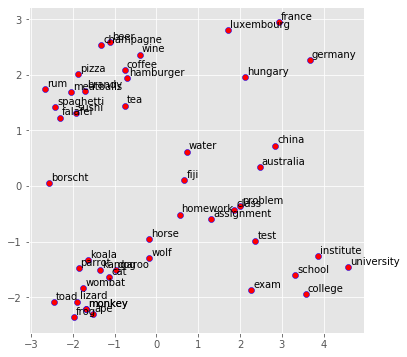

In [158]:
generate_visualisation(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

### Visualise randomly sampled words

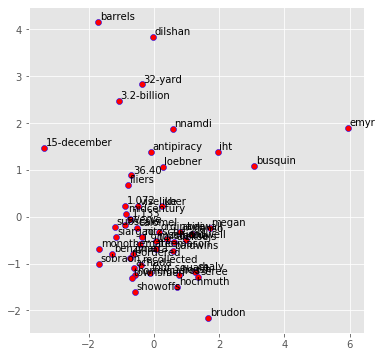

In [164]:
generate_visualisation(model, sample_size=50)